In [1]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple PyWavelets

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |################################| 4.4MB 35kB/s eta 0:00:012
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pandas

     |################################| 9.5MB 660kB/s eta 0:00:01
     |################################| 512kB 424kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple gym

     |################################| 1.6MB 632kB/s eta 0:00:01
     |################################| 1.0MB 699kB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.18.0-cp36-none-any.whl size=1656449 sha256=5f35b97729449ee0483cb2319e4222f9ec8778351f8b16fbb4eb2c39232e81ca
  Stored in directory: /root/.cache/pip/wheels/be/85/3b/480b828a4a697b37392740a040b8989f729d952b4e441a1877
Successfully built gym
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install wfdb

     |################################| 122kB 480kB/s eta 0:00:01
     |################################| 22.2MB 171kB/s eta 0:00:01    |###                             | 2.2MB 514kB/s eta 0:00:39     |##################              | 12.5MB 218kB/s eta 0:00:45     |##############################  | 21.4MB 133kB/s eta 0:00:07
     |################################| 307kB 171kB/s eta 0:00:01
     |################################| 6.9MB 135kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple utils

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pygsp

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |################################| 1.8MB 39kB/s eta 0:00:012
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple networkx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |################################| 1.6MB 1.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple texttable

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple fastprogress

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


record frequency：360
signal shape: (1000, 1)


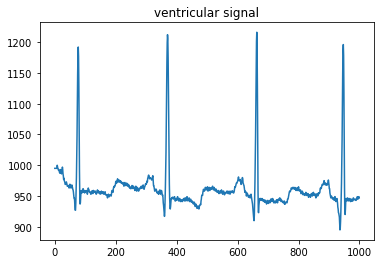

In [23]:
import wfdb
import matplotlib.pyplot as plt



record = wfdb.rdrecord('mit-bih-arrhythmia-database-1.0.0/100', sampfrom=0, sampto=25000, physical=False, channels=[0, ])
print("record frequency：" + str(record.fs))

ventricular_signal = record.d_signal[0:1000]
print('signal shape: ' + str(ventricular_signal.shape))

plt.plot(ventricular_signal)
plt.title("ventricular signal")
plt.show()

In [24]:
signal_annotation = wfdb.rdann("mit-bih-arrhythmia-database-1.0.0/100", "atr", sampfrom=0, sampto=1000)

print("chan: " + str(signal_annotation.chan))

print("sample: " + str(signal_annotation.sample))

print("symbol: " + str(signal_annotation.symbol))

print("aux_note: " + str(signal_annotation.aux_note))

chan: [0 0 0 0 0]
sample: [ 18  77 370 662 946]
symbol: ['+', 'N', 'N', 'N', 'N']
aux_note: ['(N\x00', '', '', '', '']


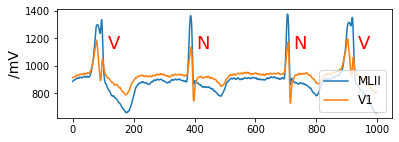

In [220]:
import wfdb
import matplotlib.pyplot as plt

data = 219

address = "mit-bih-arrhythmia-database-1.0.0/%s" %data


record = wfdb.rdrecord( address, sampfrom=27600, sampto=28600, physical=False, channels=[0, ])
#print("record frequency：" + str(record.fs))



MLII = record.d_signal
#print('signal shape: ' + str(ventricular_signal.shape))



record2 = wfdb.rdrecord(address, sampfrom=27600, sampto=28600,  physical=False, channels=[1, ])
V1 = record2.d_signal

plt.figure(figsize=(6,2))
#plt.subplot(2, 1, 1)


plt.plot(MLII, label='MLII')
#plt.ylabel('MLII/mV',fontsize=14)


signal_annotation = wfdb.rdann(address, "atr", sampfrom=27600, sampto=28600 )


#plt.subplot(2, 1, 2)
plt.plot(V1, label='V1')
#plt.ylabel('V1/mV',fontsize=14)
plt.ylabel('/mV',fontsize=14)
for index in range(0,len(signal_annotation.sample)):
    #plt.annotate(signal_annotation.symbol[index], xy=(signal_annotation.sample[index], MLII[signal_annotation.sample[index]]+10))
    plt.annotate(signal_annotation.symbol[index], xy=((signal_annotation.sample[index]-27600+20), max(V1-70)), color = 'r',fontsize=18)
plt.legend(loc="lower right", fontsize=12)
#plt.suptitle('Record %s from MIT-BIH Arrhythmia Database with Normal(N) and PVC(V)' %data ,fontsize=14) 

plt.show()

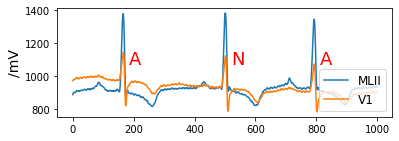

In [221]:
import wfdb
import matplotlib.pyplot as plt

data = 219

address = "mit-bih-arrhythmia-database-1.0.0/%s" %data

record = wfdb.rdrecord( address, sampfrom=114800, sampto=115800, physical=False, channels=[0, ])
#print("record frequency：" + str(record.fs))

MLII = record.d_signal
#print('signal shape: ' + str(ventricular_signal.shape))


record2 = wfdb.rdrecord(address, sampfrom=114800, sampto=115800, physical=False, channels=[1, ])
V1 = record2.d_signal

plt.figure(figsize=(6,2))
#plt.subplot(2, 1, 1)


plt.plot(MLII, label='MLII')
plt.ylabel('/mV',fontsize=14)


signal_annotation = wfdb.rdann(address, "atr", sampfrom=114800, sampto=115800)


#plt.subplot(2, 1, 2)

plt.plot(V1, label='V1')
plt.ylabel('/mV',fontsize=14)
for index in range(0,len(signal_annotation.sample)):
    #plt.annotate(signal_annotation.symbol[index], xy=(signal_annotation.sample[index], MLII[signal_annotation.sample[index]]+10))
    plt.annotate(signal_annotation.symbol[index], xy=((signal_annotation.sample[index]-114800+20), max(V1-70)), color = 'r',fontsize=18)

#plt.suptitle('Record %s from MIT-BIH Arrhythmia Database with Normal(N) and APB(A)' %data ,fontsize=14) 
plt.legend(loc="lower right", fontsize=12)
plt.show()

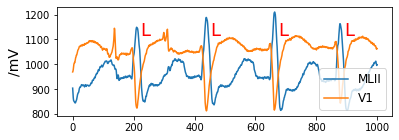

In [222]:
import wfdb
import matplotlib.pyplot as plt

data = 109

address = "mit-bih-arrhythmia-database-1.0.0/%s" %data


record = wfdb.rdrecord( address, sampfrom=3600, sampto=4600, physical=False, channels=[0, ])
#print("record frequency：" + str(record.fs))



MLII = record.d_signal
#print('signal shape: ' + str(ventricular_signal.shape))


record2 = wfdb.rdrecord(address, sampfrom=3600, sampto=4600, physical=False, channels=[1, ])
V1 = record2.d_signal

plt.figure(figsize=(6,2))
#plt.subplot(2, 1, 1)


plt.plot(MLII, label='MLII')
plt.ylabel('/mV',fontsize=14)



signal_annotation = wfdb.rdann(address, "atr", sampfrom=3600, sampto=4600)

#plt.subplot(2, 1, 2)

plt.plot(V1, label='V1')
plt.ylabel('/mV',fontsize=14)
for index in range(0,len(signal_annotation.sample)):
    #plt.annotate(signal_annotation.symbol[index], xy=(signal_annotation.sample[index], MLII[signal_annotation.sample[index]]+10))
    plt.annotate(signal_annotation.symbol[index], xy=((signal_annotation.sample[index]-3600+10), max(V1-30)), color = 'r',fontsize=18)

#plt.suptitle('Record %s from MIT-BIH Arrhythmia Database with LBBB(L)' %data ,fontsize=14) 
plt.legend(loc="lower right", fontsize=12)

plt.show()

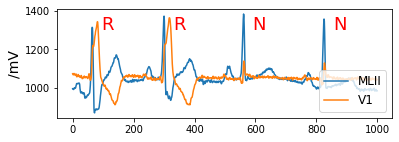

In [223]:
import wfdb
import matplotlib.pyplot as plt

data = 212

address = "mit-bih-arrhythmia-database-1.0.0/%s" %data


record = wfdb.rdrecord( address, sampfrom=22200, sampto=23200, physical=False, channels=[0, ])
#print("record frequency：" + str(record.fs))



MLII = record.d_signal
#print('signal shape: ' + str(ventricular_signal.shape))


record2 = wfdb.rdrecord(address, sampfrom=22200, sampto=23200, physical=False, channels=[1, ])
V1 = record2.d_signal

plt.figure(figsize=(6,2))
#plt.subplot(2, 1, 1)


plt.plot(MLII, label='MLII')
plt.ylabel('/mV',fontsize=14)



signal_annotation = wfdb.rdann(address, "atr", sampfrom=22200, sampto=23200)

#plt.subplot(2, 1, 2)

plt.plot(V1, label='V1')
plt.ylabel('/mV',fontsize=14)
for index in range(0,len(signal_annotation.sample)):
    #plt.annotate(signal_annotation.symbol[index], xy=(signal_annotation.sample[index], MLII[signal_annotation.sample[index]]+10))
    plt.annotate(signal_annotation.symbol[index], xy=((signal_annotation.sample[index]-22200+30), max(V1-60)), color = 'r',fontsize=18)

#plt.suptitle('Record %s from MIT-BIH Arrhythmia Database with Normal(N) and RBBB(R)' %data ,fontsize=14) 
plt.legend(loc="lower right", fontsize=12)
plt.show()